**PROBLEM STATEMENT** 
  : The problem statement for logistic regression on the Titanic dataset is to predict whether a passenger survived or not based on their features such as age, gender, class, and fare. The goal is to build a binary classification model that can accurately classify a new passenger as either having survived or not survived based on their features.

Logistic regression is a suitable model for this problem because it can model the probability of survival based on the passenger's features. The logistic regression model takes the form of a sigmoid function, which maps the input features to a probability value between 0 and 1. This probability can then be thresholded to make a binary prediction of whether the passenger survived or not.

The logistic regression model can be trained using the labeled data in the Titanic dataset, where the Survived column is used as the target variable. The model is then used to predict the survival of new passengers based on their features.

The accuracy of the logistic regression model can be evaluated using metrics such as accuracy, precision, recall, and F1 score. The model can also be visualized using a confusion matrix to see how well it is performing in terms of true positives, true negatives, false positives, and false negatives.

**Understanding of titanic dataset**

The Titanic dataset is a famous dataset used for machine learning and data analysis. It contains information about the passengers who were on board the Titanic when it sank on its maiden voyage in 1912. The dataset is often used to predict whether a passenger survived or not based on a set of features such as their age, gender, class, and fare.

The dataset contains 891 rows and 12 columns, with each row representing a passenger and each column representing a feature of the passenger. The columns include features such as the passenger's name, age, gender, ticket class, and cabin number.

The target variable in the dataset is the "Survived" column, which indicates whether the passenger survived the sinking or not (0 = did not survive, 1 = survived). The goal of many analyses of the dataset is to build a model that can accurately predict whether a new passenger would have survived or not based on their features.

The Titanic dataset is often used as a teaching tool for introductory data analysis and machine learning because of its relatively small size and simple structure.

**Column explanation**

1. PassengerId: A unique identifier for each passenger.
2. Survived: A binary variable indicating whether the passenger survived or not. 0 = did not survive, 1 = survived.
3. Pclass: The ticket class of the passenger. 1 = 1st class, 2 = 2nd class, 3 = 3rd class.
4. Name: The name of the passenger.
5. Sex: The gender of the passenger.
6. Age: The age of the passenger in years.
7. SibSp: The number of siblings/spouses the passenger had aboard the Titanic.
8. Parch: The number of parents/children the passenger had aboard the Titanic.
9. Ticket: The ticket number of the passenger.
10. Fare: The fare paid by the passenger.
11. Cabin: The cabin number of the passenger.
12. Embarked: The port of embarkation of the passenger. C = Cherbourg, Q = Queenstown, S = Southampton.

These columns provide information about the passengers that can be used to predict whether they survived or not. For example, it is known that passengers in higher ticket classes had a higher survival rate, and that women and children were more likely to survive than men. By analyzing these columns, machine learning models can be built to predict whether a new passenger would have survived or not based on their features.

In [3]:
#Importing Data: importing the necessary libraries and the dataset. I use pandas library for importing data.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [4]:
# reading data
train_df = pd.read_csv('/content/titanic_train.csv')
test_df = pd.read_csv('/content/titanic_test.csv')

In [5]:
train_df.shape #shape of train data

(891, 12)

In [6]:
test_df.shape #shape of test data

(418, 11)

**EDA**

In [7]:
train_df.head(5) # checking first five rows of train data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head(5) #checking first five rows of test data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train_df.tail(5) #checking last five rows of train data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
test_df.tail(5) #checking last five rows of test data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [11]:
train_df.describe(include='all') # the summary statistics for all columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


The code train_df.describe(include='all') returns the summary statistics of a Pandas DataFrame named train_df, including descriptive statistics for both numeric and non-numeric columns.

The include='all' argument means that statistics will be calculated for all columns, including non-numeric columns such as object and categorical columns. Here's what each of the statistics means:

count: The number of non-null values for each column.

unique: The number of unique values for each column. Only applies to non-numeric columns.

top: The most frequently occurring value for each column. Only applies to non-numeric columns.

freq: The frequency of the most frequently occurring value for each column. Only applies to non-numeric columns.

mean: The mean value for each numeric column.

std: The standard deviation of the values for each numeric column.

min: The minimum value for each numeric column.

25%: The first quartile value (25th percentile) for each numeric column.

50%: The median value (50th percentile) for each numeric column.

75%: The third quartile value (75th percentile) for each numeric column.

max: The maximum value for each numeric column.

In [12]:
test_df.describe(include='all') #the summary statistics for all columns of test dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [13]:
train_df.info() # understand the structure of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The code train_df.info() returns information about a Pandas DataFrame named train_df, including the data type, number of non-null values, and memory usage for each column.

The output of train_df.info() includes:

The number of rows and columns in the DataFrame.

The name of each column and its data type (e.g., int64, float64, object).
The number of non-null values in each column.

The memory usage of the DataFrame.

The output of train_df.info() can help to understand the structure of  DataFrame and identify potential issues, such as missing values or columns with incorrect data types.

In [14]:
test_df.info() # understand the structure of test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
# to understand the unique values in train dataset 
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [16]:
test_df.nunique()   # to understand the unique values in test dataset

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [17]:
train_df['Sex'].unique() #checking uniques of Sex column

array(['male', 'female'], dtype=object)

In [18]:
train_df['Pclass'].unique() #checking uniques of Pclass column

array([3, 1, 2])

In [19]:
train_df['Survived'].unique() #checking uniques of Servived column

array([0, 1])

In [20]:
train_df['Age'].unique() #checking uniques of Age column

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [21]:
train_df['SibSp'].unique() #checking uniques of SibSp column

array([1, 0, 3, 4, 2, 5, 8])

In [22]:
train_df['Parch'].unique() #checking uniques of Parch column

array([0, 1, 2, 5, 3, 4, 6])

In [23]:
train_df['Ticket'].unique() #checking uniques of Ticket column

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [24]:
train_df['Embarked'].unique()    #checking uniques of Embarked column

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
train_df.isnull() #checking null values in train data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:xlabel='Age', ylabel='Density'>

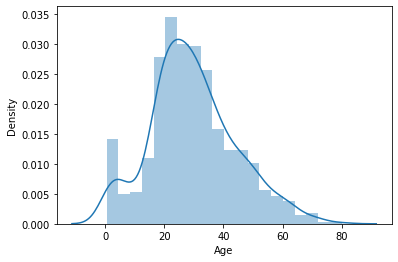

In [26]:
sns.distplot(train_df['Age']) # understanding distribution of column Age

<AxesSubplot:xlabel='Survived', ylabel='count'>

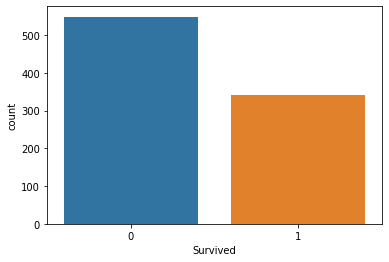

In [27]:
sns.countplot(x="Survived", data = train_df)   # countplot of target variable to check balanced or not

<AxesSubplot:xlabel='Pclass', ylabel='count'>

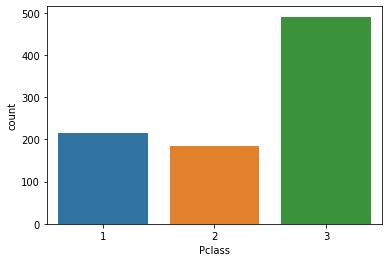

In [28]:
sns.countplot(train_df['Pclass'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

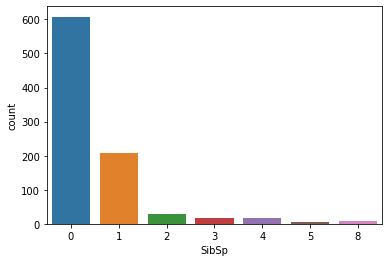

In [29]:
sns.countplot(train_df['SibSp'])

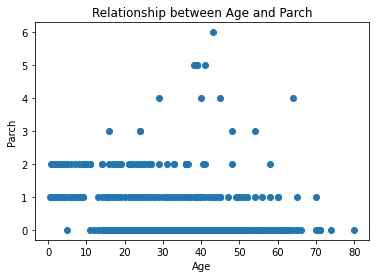

In [30]:
plt.scatter(train_df['Age'], train_df['Parch'])
plt.xlabel('Age')
plt.ylabel('Parch')
plt.title('Relationship between Age and Parch')
plt.show()

<AxesSubplot:>

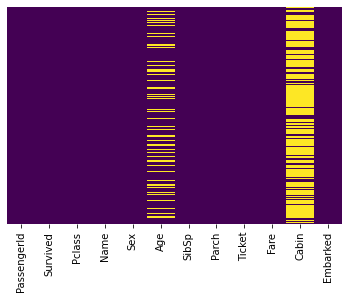

In [31]:
sns.heatmap(train_df.isnull(), yticklabels = False, cbar = False,cmap = 'viridis') # heatmap for null values

'train_df.isnull()': This returns a dataframe of boolean values where 'True' indicates a null value.

'yticklabels = False': This removes the y-axis tick labels from the heatmap.

'cbar = False': This removes the colorbar from the heatmap.

'cmap = 'viridis'': This sets the color map to 'viridis', which is a popular color map in seaborn.

A heatmap that displays the null values in the 'train_df' dataframe using a color scheme where yellow indicates missing values, and blue indicates non-missing values.

<AxesSubplot:xlabel='Survived', ylabel='count'>

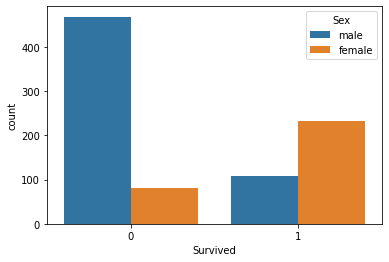

In [32]:
sns.countplot(x="Survived", hue="Sex", data = train_df) #countplot of target variable with respect to Sex column

'x="Survived"': This sets the 'Survived' column as the x-axis variable.
'hue="Sex"': This sets the 'Sex' column as the grouping variable that distinguishes the bars on the plot.
'data=train_df': This sets the dataframe to 'train_df', so the data is taken from this dataframe.

<AxesSubplot:xlabel='Survived', ylabel='count'>

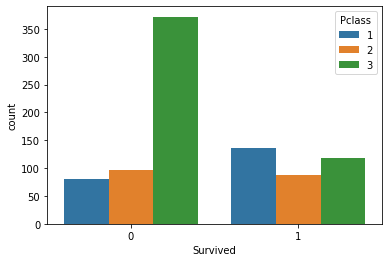

In [33]:
sns.countplot(x="Survived",hue="Pclass",data=train_df) #countplot of target variable with respect to Pclass column 

It is useful for identifying any class-based patterns in survival rates among the passengers in the 'train_df' dataframe. For example, it may show that passengers in first class were more likely to survive than those in second or third class.

<AxesSubplot:ylabel='Frequency'>

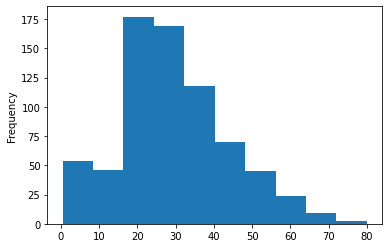

In [34]:
train_df["Age"].plot.hist() #histogram plot for Age column

Histograms are useful for visualizing the shape of a distribution, including the center, spread, and skewness of the data. This plot can be useful for identifying any age-based patterns in the 'train_df' dataframe, such as a high frequency of children or elderly passengers.

<AxesSubplot:ylabel='Frequency'>

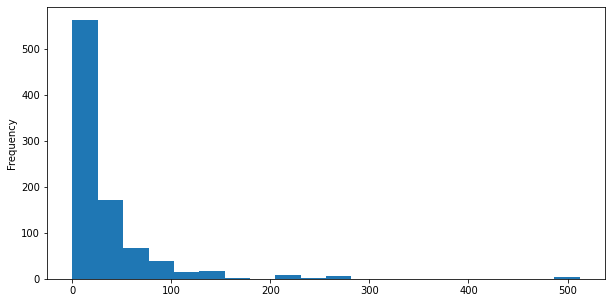

In [35]:
train_df["Fare"].plot.hist(bins=20,figsize=(10,5)) #histogram for Fare column to understand it's distribution

'train_df["Fare"]': This selects the 'Fare' column from the 'train_df' dataframe.
'bins=20': This sets the number of bins in the histogram to 20, which determines the number of intervals that the data will be divided into.
'figsize=(10,5)': This sets the size of the figure to (10, 5), which means the plot will be 10 inches wide and 5 inches tall.

This plot can be useful for identifying any fare-based patterns in the 'train_df' dataframe, such as a high frequency of low fares or a few extreme outliers with high fares. 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

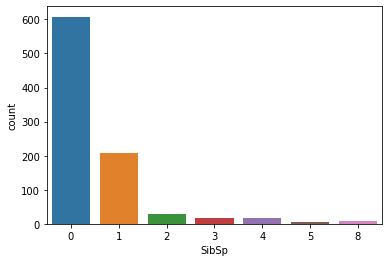

In [36]:
sns.countplot(x="SibSp", data = train_df)     # count plot of SibSp column to understand 

 It may show that a majority of passengers traveled without any siblings/spouses, or that a significant number of passengers traveled with one or two siblings/spouses. This information can be useful for understanding the composition of the passenger group and potentially identifying factors that may have influenced their survival.

In [37]:
train_df# Group the data frame by values in Survived column, and count the number of occurrences of each group.
survived_count = train_df.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

The resulting Series object has two rows, with the first row corresponding to the count of passengers who did not survive, and the second row corresponding to the count of passengers who survived.

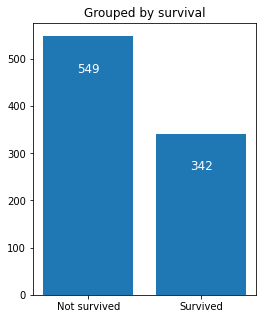

In [38]:
# Grouped by survival
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')

The x-axis represents the two groups, 'Not survived' and 'Survived', and the y-axis represents the count of passengers in each group. The text on each bar shows the count of passengers in each group.

In [39]:
sex_count = train_df.groupby('Sex')['Sex'].count()
sex_count

Sex
female    314
male      577
Name: Sex, dtype: int64

The resulting Series object has two rows, with the first row corresponding to the count of male passengers, and the second row corresponding to the count of female passengers.

This information can be useful for understanding the gender distribution of the passengers in the 'train_df' dataframe.

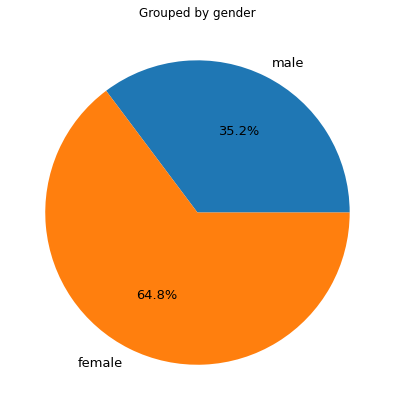

In [40]:
plt.figure(figsize=(7,7))
plt.title('Grouped by gender')
plt.pie(sex_count.values, labels=['male', 'female'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

The chart shows the percentage of male and female passengers in the dataset, and can be useful for understanding the gender balance of the passengers.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

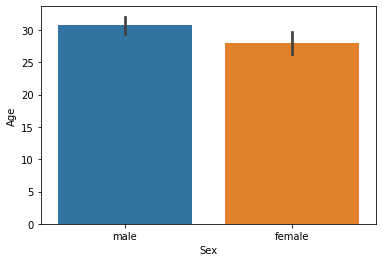

In [41]:
sns.barplot(x='Sex', y='Age', data=train_df)

The plot shows the mean age for each gender and can be useful for understanding differences in age distribution between male and female passengers.

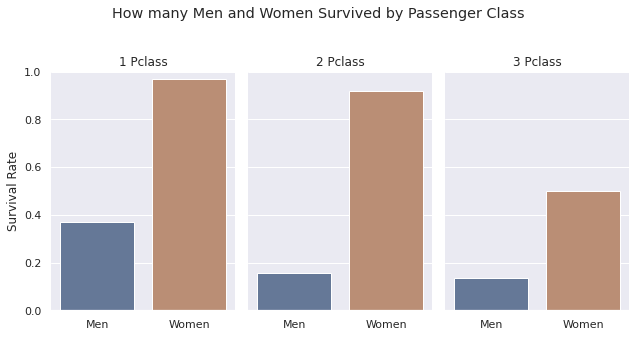

In [42]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=train_df, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

'sns.set(font_scale=1)': This sets the font scale for the plot.

'g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=train_df, saturation=.5, kind="bar", ci=None, aspect=.6)':
 This creates a factor plot using the seaborn library. The 'x' parameter specifies the column to use for the x-axis (which in this case is the 'Sex' column), the 'y' parameter specifies the column to use for the y-axis (which in this case is the 'Survived' column), the 'col' parameter specifies the column to use for creating subplots (which in this case is the 'Pclass' column), the 'data' parameter specifies the dataframe to use (which in this case is the 'train_df' dataframe), and the 'kind' parameter specifies the type of plot to create (which in this case is a bar plot). The other parameters are used to customize the appearance of the plot.

'(g.set_axis_labels("", "Survival Rate").set_xticklabels(["Men", "Women"]).set_titles("{col_name} {col_var}").set(ylim=(0, 1)).despine(left=True))':
 This sets the axis labels, titles, limits, and appearance of the plot using the seaborn library.
'plt.subplots_adjust(top=0.8)': This adjusts the spacing between the subplots in the plot.
'g.fig.suptitle('How many Men and Women Survived by Passenger Class')': This sets the title of the plot.
 This plot is useful for understanding how survival rates varied by passenger class and gender.

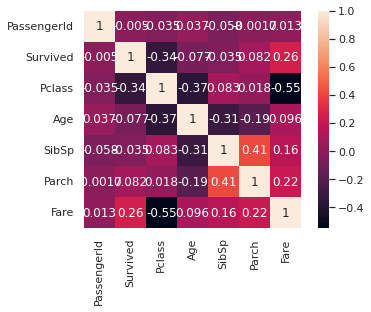

In [43]:
# heat map for understanding correlation 
corr = train_df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

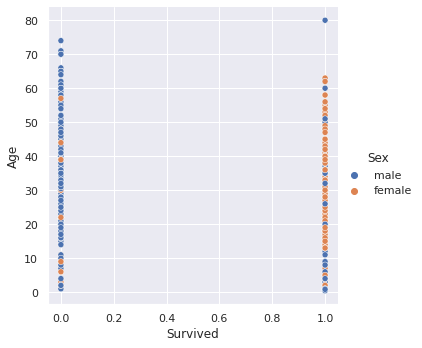

In [44]:
#bivariate analysis
sns.relplot(x='Survived', y='Age', hue='Sex', data=train_df)

The resulting plot shows a scatter plot of 'Survived' vs 'Age', with the points colored by 'Sex'. The plot allows us to see whether there is any relationship between 'Survived' and 'Age', and whether that relationship is different for males and females.

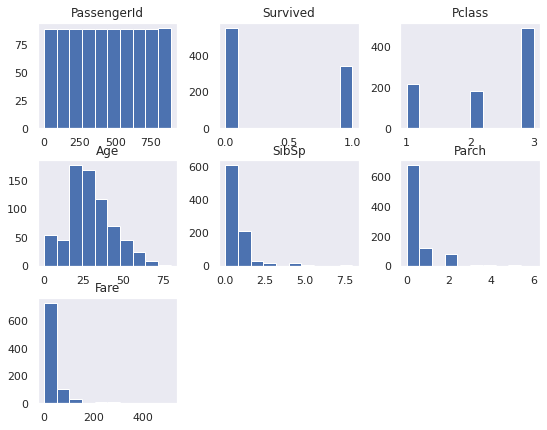

In [45]:
train_df.hist(bins=10,figsize=(9,7),grid=False);

**Preprocessing**

1.Handle missing data

In [46]:
train_df.isnull() #checking the null values in train dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
train_df.isnull().sum() #checking the null values in train dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked columns have null values

In [48]:
test_df.isnull() #checking the null values in test dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [49]:
test_df.isnull().sum() #checking null values in test dataset

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age, Cabin and Fare columns have null values

In [50]:
#Filling null values of cabin column in train dataset
train_df.loc[train_df['Cabin'].isnull() & (train_df['Pclass'] == 1), 'Cabin'] = 'A'
train_df.loc[train_df['Cabin'].isnull() & (train_df['Pclass'] == 2), 'Cabin'] = 'D'
train_df.loc[train_df['Cabin'].isnull() & (train_df['Pclass'] == 3), 'Cabin'] = 'G'

Fill null values based on another column: If another column that is related to the cabin column, such as the passenger class or the fare, I can use that information to fill in the null values. For example, I could assume that passengers in higher classes or with higher fares were more likely to have cabins

In [51]:
#filling null values of cabin column in test dataset
test_df.loc[test_df['Cabin'].isnull() & (test_df['Pclass'] == 1), 'Cabin'] = 'A'
test_df.loc[test_df['Cabin'].isnull() & (test_df['Pclass'] == 2), 'Cabin'] = 'D'
test_df.loc[test_df['Cabin'].isnull() & (test_df['Pclass'] == 3), 'Cabin'] = 'G'

In [52]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,D,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,G,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,G,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,G,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,D,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,G,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,G,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,G,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,G,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,G,S


In [54]:
#fill null values with median of Pclass and Age, to fill Age column in train data
train_df['Age'] = train_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

The 'groupby' method is used to group the data by 'Pclass', and then the 'transform' method is used to apply the 'fillna' function to each group. The 'fillna' function fills the null values with the median age of each group. Finally, the 'Age' column is updated with the filled values.

Overall, this code is a good way to handle missing values in the 'Age' column, taking into account the relationship between age and passenger class.

In [55]:
#fill null values with median of Pclass and Age to Age column in test data
test_df['Age'] = test_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [56]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,D,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,G,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [57]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,G,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,G,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,D,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,G,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,G,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,G,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,G,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,G,S


In [58]:
train_df.isnull().sum()     #checking null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [59]:
train_df['Embarked'].fillna(method='ffill', inplace=True)     #train_df['Embarked'].fillna(mode_embarked, inplace=True)

method='ffill' specifies the 'ffill' method, which fills missing values with the previous non-null value in the column. In other words, it forwards fills the missing values.

In [60]:
test_df['Embarked'].fillna(method='ffill', inplace=True)   #fill null values with previous non null values of Embarked column

In [61]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [62]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [63]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median()) #fill null values with median

Fill missing values for the Fare feature using the median of the column. In this example, we're using the median instead of the mean because the Fare feature is known to have a few extreme values that could affect the mean.

In [64]:
test_df.isnull().sum() #Zero null values

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

2.Encode categorical variables

In [65]:
train_df['Sex'] = train_df['Sex'].apply(lambda x: 1 if x == 'male' else 0) #convert Categorical values to numerical

Convert the 'Sex' feature to numerical values using a lambda function. In this, I'm converting 'male' to 1 and 'female' to 0.

In [66]:
test_df['Sex'] = test_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [67]:
embarked_map = {'S': 0, 'C': 1, 'Q': 2} #covert categorical values to numerical of Embarked column
train_df['Embarked'] = train_df['Embarked'].map(embarked_map).fillna(3)

Create a dictionary embarked_map that maps each possible value of the 'Embarked' feature to a numerical value.

Use the map() method to apply the embarked_map dictionary to the 'Embarked' feature. Any missing values are filled with fillna(3).

In [68]:
embarked_map = {'S': 0, 'C': 1, 'Q': 2} #covert categorical values to numerical of Embarked column
test_df['Embarked'] = test_df['Embarked'].map(embarked_map).fillna(3)

In [69]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,G,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,G,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,D,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,G,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1


3.Handling outliers

<AxesSubplot:>

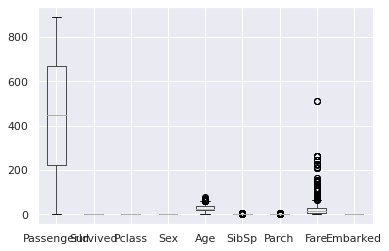

In [70]:
# box plot fr checking outliers
train_df.boxplot()

<AxesSubplot:xlabel='Age'>

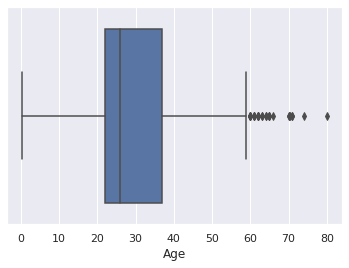

In [71]:
sns.boxplot(train_df['Age'])

In [72]:
Q1 = train_df['Age'].quantile(0.25)
Q3 = train_df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
train_df = train_df[(train_df['Age'] >= Q1 - 1.5*IQR) & (train_df['Age'] <= Q3 + 1.5*IQR)]

The "Fare" column in the Titanic dataset represents the amount paid by each passenger for their ticket. It is possible that some passengers paid much higher fares than others, perhaps due to differences in ticket class, cabin location, or other factors. If the outliers in the "Fare" column are genuine values and are not due to data entry errors or measurement errors, removing them might result in a loss of valuable information and potentially bias the analysis or model.

<AxesSubplot:xlabel='Age'>

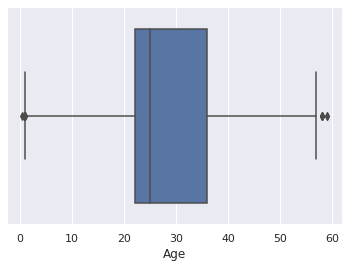

In [73]:
sns.boxplot(train_df['Age'])

<AxesSubplot:>

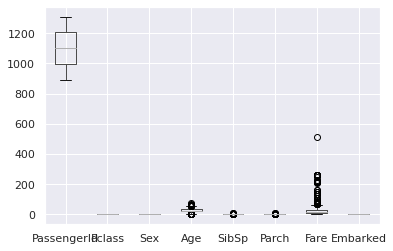

In [74]:
test_df.boxplot() #checking outliers in test dataset

<AxesSubplot:xlabel='Age'>

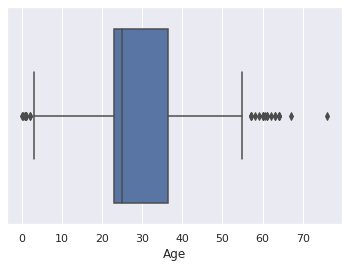

In [75]:
sns.boxplot(test_df['Age'])

 logistic regression is not particularly sensitive to outliers in the predictor variables (such as age), as long as the response variable (such as survival status) is not heavily influenced by the outliers. In other words, if the outliers in the "Age" column do not strongly affect the survival status of the passengers, removing them may not be necessary for building a logistic regression model.

In [76]:
Q1 = train_df['Age'].quantile(0.25)
Q3 = train_df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
test_df = test_df[(test_df['Age'] >= Q1 - 1.5*IQR) & (test_df['Age'] <= Q3 + 1.5*IQR)]

<AxesSubplot:xlabel='Age'>

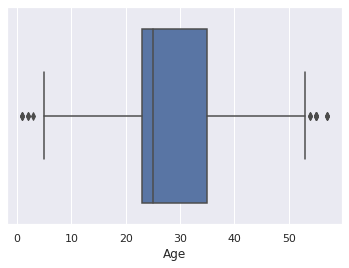

In [77]:
sns.boxplot(test_df['Age'])

4.Drop unnecessary columns

In [78]:
# Drop irrelevant features
train_df.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1, inplace=True)

In [79]:
# Drop irrelevant features
test_df.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1, inplace=True)

5.Feature Engineering:

In [80]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [81]:
test_df.loc[:, 'FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [82]:
train_df['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [83]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,0,2
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,24.0,1,2,23.4500,0,4
889,1,1,1,26.0,0,0,30.0000,1,1


In [84]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,1,34.5,0,0,7.8292,2,1
1,3,0,47.0,1,0,7.0000,0,2
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,3
5,3,1,14.0,0,0,9.2250,0,1
...,...,...,...,...,...,...,...,...
413,3,1,24.0,0,0,8.0500,0,1
414,1,0,39.0,0,0,108.9000,1,1
415,3,1,38.5,0,0,7.2500,0,1
416,3,1,24.0,0,0,8.0500,0,1


6.Split the data

In [85]:
# Separate the target variable from the input features
y = train_df['Survived']
X = train_df.drop('Survived', axis=1)

In [86]:
# Split the data into training and validation sets
train_size = int(len(train_df) * 0.8) # 80% of the data is used for training
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Print the size of each set
print('Training set size:', len(X_train))
print('Validation set size:', len(X_val))

Training set size: 692
Validation set size: 173


7.Scale numerical features

In [87]:
class StandardScaler:
  def __init__(self):
    self.mean = None
    self.variance = None
  def fit(self,set):
    self.mean = np.mean(set,axis=0)
    self.variance = np.var(set,axis=0)
  def transform(self,set):
    return(set - self.mean)/np.sqrt(self.variance)
  def fit_transform(self,set):
    self.fit(set)
    return self.transform(set)
    



In [88]:
num_cols = ['Age', 'Fare', 'SibSp','Parch','Embarked','Sex','FamilySize']
x_train_num = train_df[num_cols]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(x_train_num)

# Scale the numerical features in the training set
train_df[num_cols] = scaler.transform(x_train_num)

# Scale the numerical features in the validation set
x_val_num = train_df[num_cols]
train_df[num_cols] = scaler.transform(x_val_num)


In [89]:
num_cols = ['Age', 'Fare', 'SibSp','Parch','Embarked','Sex','FamilySize']
test_num = test_df[num_cols]
# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the scaler on the training set
scaler.fit(test_num)
# Scale the numerical features in the training set
test_df[num_cols] = scaler.transform(test_num)


In the Titanic dataset, for example, some numerical features that may need to be scaled using StandardScaler are Age, Fare, SibSp, and Parch. However, features like PassengerId and Ticket may not need to be scaled, as they are just identifiers and do not represent meaningful numerical values. Similarly, the Survived feature may not need to be scaled, as it is a binary variable representing the outcome of interest.




In [90]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,0.220529,-2.411803,-0.100334,-1.069026,-0.652357,-1.467762,-1.147682
1,1,1,-4.128352,-2.297141,-0.100334,-1.069026,-0.626337,1.003553,-1.147682
2,1,3,-4.128352,-2.383137,-0.904704,-1.069026,-0.652083,-1.467762,-1.526928
3,1,1,-4.128352,-2.318640,-0.100334,-1.069026,-0.633726,-1.467762,-1.147682
4,0,3,0.220529,-2.318640,-0.904704,-1.069026,-0.652032,-1.467762,-1.526928
...,...,...,...,...,...,...,...,...,...
886,0,2,0.220529,-2.375971,-0.904704,-1.069026,-0.650021,-1.467762,-1.526928
887,1,1,-4.128352,-2.433302,-0.904704,-1.069026,-0.643113,-1.467762,-1.526928
888,0,3,-4.128352,-2.397470,-0.100334,2.017100,-0.645775,-1.467762,-0.389189
889,1,1,0.220529,-2.383137,-0.904704,-1.069026,-0.643113,1.003553,-1.526928


A negative sign before a scaled value indicates that the original value was below the mean of the dataset. Standard scaling (also called Z-score normalization) transforms a dataset so that it has a mean of zero and a standard deviation of one. This means that any value below the mean will have a negative standardized value, while any value above the mean will have a positive standardized value.

For example, if the original family size values have a mean of 3 and a standard deviation of 1, a family size of 2 would have a standardized value of -1 (since it is one standard deviation below the mean). A family size of 4 would have a standardized value of +1 (since it is one standard deviation above the mean), and a family size of 3 would have a standardized value of 0 (since it is exactly at the mean).

In [91]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,0.742146,0.553360,-0.479701,-0.379337,-0.518260,2.236373,-0.527539
1,3,-1.347443,1.691382,0.621116,-0.379337,-0.535820,-0.679358,0.131055
3,3,0.742146,-0.129454,-0.479701,-0.379337,-0.500613,-0.679358,-0.527539
4,3,-1.347443,-0.584663,0.621116,0.659261,-0.423846,-0.679358,0.789650
5,3,0.742146,-1.312997,-0.479701,-0.379337,-0.488701,-0.679358,-0.527539
...,...,...,...,...,...,...,...,...
413,3,0.742146,-0.402579,-0.479701,-0.379337,-0.513584,-0.679358,-0.527539
414,1,-1.347443,0.963048,-0.479701,-0.379337,1.622132,0.778507,-0.527539
415,3,0.742146,0.917527,-0.479701,-0.379337,-0.530525,-0.679358,-0.527539
416,3,0.742146,-0.402579,-0.479701,-0.379337,-0.513584,-0.679358,-0.527539


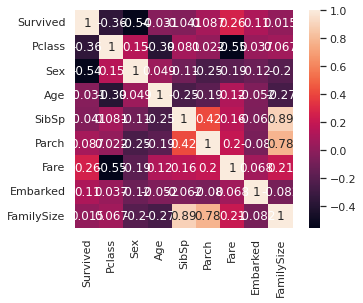

In [92]:
# heatmap for selected features to understand correlation
corr = train_df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

In [93]:
correlations = train_df[['Survived', 'Age', 'Embarked', 'Sex', 'Pclass', 'Parch','Fare']].corr()
print(correlations)

          Survived       Age  Embarked       Sex    Pclass     Parch      Fare
Survived  1.000000 -0.031096  0.113391 -0.539169 -0.356822  0.086737  0.263778
Age      -0.031096  1.000000 -0.052444  0.048546 -0.390677 -0.187774  0.123392
Embarked  0.113391 -0.052444  1.000000 -0.123054  0.037014 -0.080184  0.068120
Sex      -0.539169  0.048546 -0.123054  1.000000  0.148482 -0.254608 -0.186887
Pclass   -0.356822 -0.390677  0.037014  0.148482  1.000000  0.022340 -0.553921
Parch     0.086737 -0.187774 -0.080184 -0.254608  0.022340  1.000000  0.196133
Fare      0.263778  0.123392  0.068120 -0.186887 -0.553921  0.196133  1.000000


<AxesSubplot:>

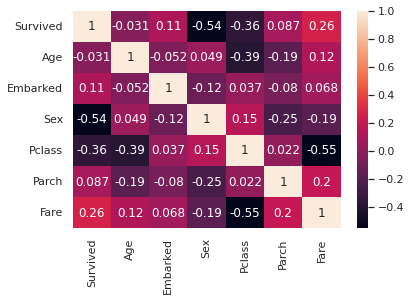

In [94]:

import seaborn as sns
sns.heatmap(correlations, annot=True)
